In [10]:
import numpy
import math
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
plt.rcParams["figure.figsize"] = (30, 20)
plt.rcParams.update({'font.size': 40})

In [3]:
def f_x_y(x1, x2):
    return 0.5*x1**2 + (5/2)*x2**2 - x1*x2 - 2*(x1 + x2)

In [8]:
def gradient(x1, x2):
    return numpy.array([-2 + x1 - x2, -2 - x1 + 5*x2])

In [5]:
def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)

In [21]:
epsilon = pow(10,-6)
t = 0.1
i = 1
x1, x2 = 2, 1
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
evolution_X1_X2 = [[x1, x2]]
while n_grad > epsilon:
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = numpy.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1

In [16]:
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

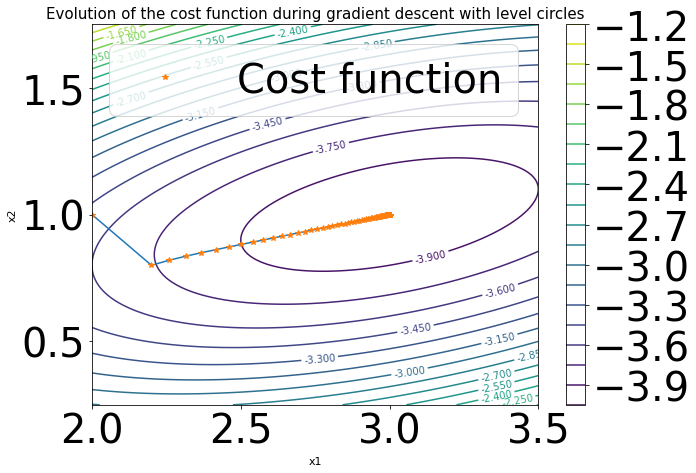

In [19]:
x1 = numpy.linspace(2, 3.5, 150)
x2 = numpy.linspace(0.25, 1.75, 150)
X1, X2 = numpy.meshgrid(x1, x2)
Z = f_x_y(X1, X2)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()